<a href="https://colab.research.google.com/github/angelotc/Decomposition-of-Retail-Companies/blob/master/FriedmanIsoForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection 

In [50]:
# Create synthetic dataset using make_friedman1. N = 100k

X, y = make_friedman1(
    n_samples=100000, n_features = 5,  noise=0, random_state=1)

# Divide 10% of the dataset as the test set ; 90% of the dataset into a training set. 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [54]:
# Fit it to the model.
# Note on contamination parameter: This is a parameter that the algorithm is quite sensitive to; it refers to the expected 
# proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples.

clf = IsolationForest(max_samples='auto', contamination = 0, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

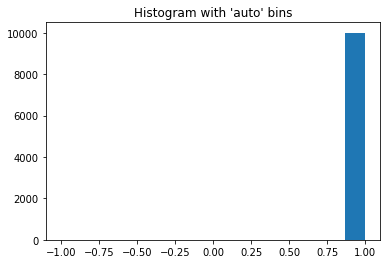

In [55]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(y_pred_test, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [56]:
pd.DataFrame(y_pred_test).value_counts()



 1    9998
-1       2
dtype: int64

The above says that only 2 of the 10k test set samples are found as outliers. Of course, these are false-positives, since they are are generated by the formula of Friedman formula:


y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).